# Few notes before starting this ANN implementation

- Deep learning based code have special hardware requirements such as GPU. This is the reason why Google Colab is recommended over local Jupyter notebook for implementation since Google Colab provides an option to run you DL code over on top free version of GPU resource.

- In order to enable GPU as the runtime resource traverse through the following options in Google Colab:
  Runtime>Change Runing Type> Set Runtime type to Python 3> Set Hardware accelerator to GPU> GPU type:   T4 is the free version of GPU in colab> Save.
  
- Also, verify the GPU setting by traversing through the same options.

In [1]:
#Checking the default pip list available in the Google Colab
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.4
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.2.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.0
arviz                            0.15.1
astropy                          5.2.2
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blis                             0.7.9


In [3]:
#Importing pandas to read the csv dataset

import pandas as pd

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/sagnikghoshcr7/Bank-Customer-Churn-Prediction/master/Churn_Modelling.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.shape
#We have 10000 records

(10000, 14)

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
#Droping the less important features

df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

C:\Users\seema\AppData\Local\Temp\ipykernel_1964\3498485897.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


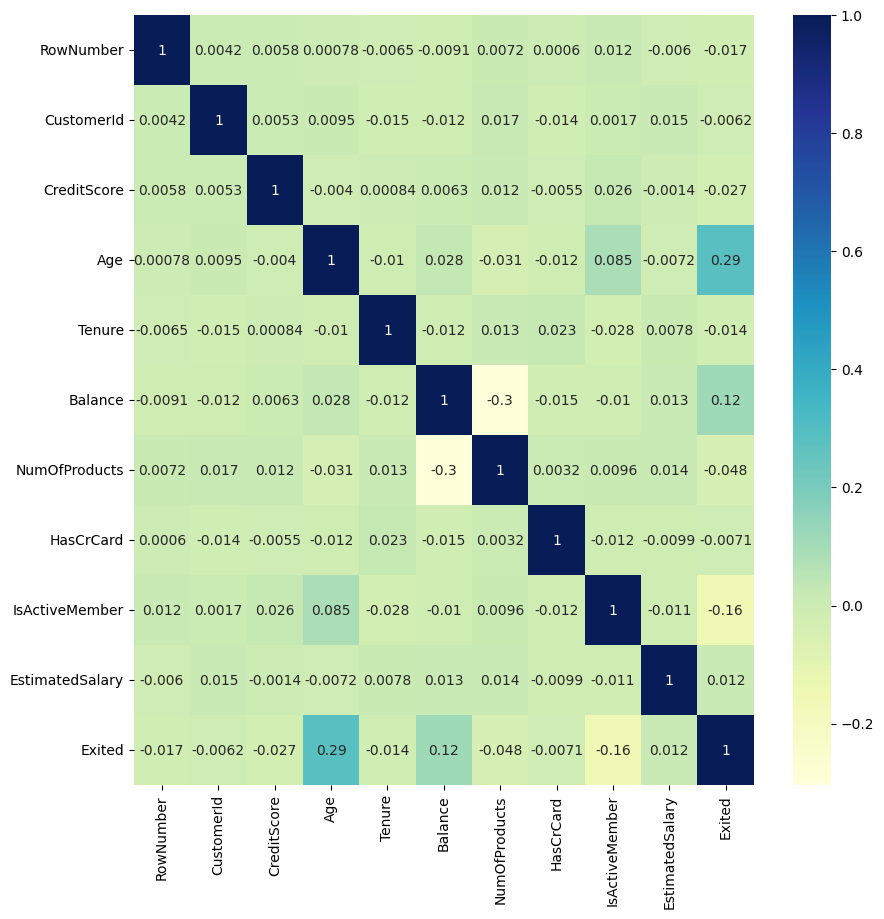

In [12]:
#Trying to build an intution for droping columns=['RowNumber', 'CustomerId', 'Surname']

import seaborn as sns
import matplotlib.pyplot as plt

#dataplot=sns.heatmap(df.corr())
plt.figure(figsize=(10,10))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()
#sns.pairplot(df)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
#Performing one hot encoding on "Geography" and "Gender" columns

df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

#drop_first done inorder to overcome overfitting. This is standard approach. Learned in depth about
#this in some previous lesson. Here we are basically removing the repeated features. Say for example
#Where Gender_Male is not 0 it means that record represents male. In this way using only one feature
#we are able to represent both the Male and Female categories where we have eliminated Gender_Female
#Feature created using .get_dummies()

# Note:
Ques: We can observe that one hot encoding used for encoding categorical features: "Geography" and "Gender"  increases sparcity (0s and 1s).Then why we have not used label encoding here?

Ans: There were only 3 categories(value_count for Geography) and 2 categories(value_count for Gender) so using one hot encoding is fine. But in case there were a lot of categories then we would have used label enconding over one hot encoding. Also, we have used drop_first=True in one hot encoding which in a way is reducing the sparcity by eliminating one repeated featue containig 0s and 1s.

# Spare matrix leads to overfitting

In [15]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [19]:
#Input or independent features

X=df.drop(["Exited"],axis=1)

In [20]:
#Output or dependent feature

y=df["Exited"]

In [13]:
#Using Keras for implementing ANNN

import tensorflow
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

In [22]:
#layers in the neural network follows a sequence that is Input layer followed by Hidden layer(s)
#followed by Output layer.This is the sequence in which Neural Network utilized during forward or
#backward propagation. This is why we are importing Sequential
from tensorflow.keras import Sequential 

#Dense is resposible for creating layers in neural network
from tensorflow.keras.layers import Dense

In [23]:
len(X.columns)  #Representing number of nodes or neurons to be used in the Input layer

11

In [34]:
model=Sequential()  

#Below we are adding layers on top of sequential model. Using input_dim=11 we are instructing to
#create input layer with 11 nodes/neurons. Also, at the same time we are passing 11 as first attribute
#instructing to add first hidden layer with 11 nodes/neurons. Sigmoid function is something
#that we are going to use as the activation function
model.add(Dense(11,activation="sigmoid",input_dim=11))#input layer + first hidden layer

#Adding second hidden layer with 11 nodes/neurons
model.add(Dense(11,activation="sigmoid"))#Second hidden layer

#Adding output layer with 1 node/neuron
model.add(Dense(1,activation="sigmoid"))#output layer

In [31]:
#Generating the summary of the sequential model added with Input, Hidden and Output layer

model.summary()

#Since, we have not defined any dimension while passing number of nodes/neurons so by default nodes
#are arranged along the column

#Please note that here Weights and Bias initiallization is automatically taken care of at the backend
#Later we will understand how we do this manually using different approaches

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [32]:
#Making test and train split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [33]:
#In this case since we are using gradient descent as the parameter optimization algorithm then we 
#will need to scale the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [35]:
#Before we start to train our ANN based model we need to compile it with certain parameters as the
#pre-requisite which is as follows:
#1.Here, during forward propogation for calculating loss we are goining to use "binary_crossentropy"
#2.Here, during backward propogation for optimizing trainable parameters we will use "Adam" optimizer
#Please note that "Adam" optimizer is the Gradient descent type of optimization algorithm.
#3.Here we are goinig to use "accuracy" metric for the evaluating the performance of ANN based
#model

model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [39]:
#Training ANN based model on top of scaled training dataset

model.fit(X_train_scale,y_train,batch_size=50,epochs=10,verbose=1)

#1 epochs = 1 forward propagation + 1 backward propagation. So 10 epochs will be equivalent to 10
#forward and 10 backward propagations

#By using verbose=1 we are basically instructing to print the Training logs at the runtime

#We have 10000 records out of which 0.2 or 20% is Test dataset. That means 80% or 8000 records 
#is train dataset. Using batch_size=50 while training model we are basically dividing 8000
#records in 50 equal batches. That's why each Epoch consists of 160 records. 160/160 represents that
#out of 160 Epoch, total 160 Epoch executed successfully

#Since, we are currently in Training phase so loss or accuracy that is mentioned below represents
#is w.r.t training

Epoch 1/10
160/160 [==============================] - 1s 5ms/step - loss: 0.3266 - accuracy: 0.8652
Epoch 2/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3268 - accuracy: 0.8639
Epoch 3/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3266 - accuracy: 0.8639
Epoch 4/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3265 - accuracy: 0.8639
Epoch 5/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3267 - accuracy: 0.8649
Epoch 6/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3266 - accuracy: 0.8637
Epoch 7/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3263 - accuracy: 0.8641
Epoch 8/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3265 - accuracy: 0.8650
Epoch 9/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3267 - accuracy: 0.8644
Epoch 10/10
160/160 [==============================] - 1s 4ms/step - loss: 0.3266 - accuracy: 0.8641

In [44]:
#Making prediction using Test dataset on top of trained model using ANN

y_pred=model.predict(X_test_scale)

63/63 [==============================] - 0s 4ms/step


In [45]:
y_pred

array([[0.3759589 ],
       [0.24631697],
       [0.13730551],
       ...,
       [0.12392857],
       [0.15476103],
       [0.23126784]], dtype=float32)

In [49]:
#Above we can see that Predicitions are not whole numbers. Actually Target feature is in terms of
#whole number (0 and 1). So it order to convert the predicted values into whole numbers we are using
#argmax fun^.

y_pred=y_pred.argmax(axis=-1)

In [50]:
#Calculating the Test accuracy. Note that in classification based problem statement we import
#accuracy_score whereas, in regression based problem statement we import r2_score

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975